In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

In [273]:
# Read all dataframe from 9geek website.
# c = constituency; candi = candidate
pwd = "9geek_dataset/"
info_c9 = pd.read_csv(pwd + "info_constituency9.csv")
info_party9 = pd.read_csv(pwd + "info_party9.csv")
info_province9 = pd.read_csv(pwd + "info_province9.csv")
result_partylist9 = pd.read_csv(pwd + "result_partylist9.csv")
result_cstatus9 = pd.read_csv(pwd + "result_constituency_status9.csv")
result_candi9 = pd.read_csv(pwd + "result_candidate9.csv")

# Read my personal dataframe
info_province = pd.read_csv("PL_info_province.csv")
result_candi = pd.read_csv("PL_result_constituencies_CandidateConst.csv")
result_party = pd.read_csv("PL_result_constituencies_PartylistConst.csv")
result_overall = pd.read_csv("PL_result_constituencies_Overall.csv").rename(columns = {"Unnamed: 0":"cons_id"})
result_overall = result_overall.drop(columns = result_overall.columns.tolist()[4:]).set_index("cons_id")

In [274]:
# Create a map between party ID, color, and name
id_name = dict(zip(info_party9["id"], info_party9["name"]))
id_no = dict(zip(info_party9["id"], info_party9["party_no"]))
party_color_map = dict(zip(info_party9["id"], info_party9["color"]))

In [385]:
# Subset the partylist result to obtain the number of partylist votes each party obtains
id = 761
partylist_no = id_no[id]
party_result_id = result_party[result_party["party_id"] == id].set_index("cons_id")

party_result_id

,party_id,party_list_vote,party_list_vote_percent
cons_id,,,
ACR_1,761,672,0.63652
ACR_2,761,263,0.23521
ATG_1,761,95,0.10584
ATG_2,761,147,0.16072
AYA_1,761,422,0.38253
...,...,...,...
YLA_2,761,2470,2.46215
YLA_3,761,55,0.05615
YST_1,761,391,0.35387


In [386]:
# Identify the vote and the party affiliation constituent candidates with the same number receive 
candi_same_id = [cons_id + "_%s" %(int(partylist_no)) for cons_id in party_result_id.index.tolist()]

temp = result_candi[result_candi["mp_app_id"].isin(candi_same_id)].set_index("cons_id").drop(columns=["mp_app_rank","percent","mp_app_id"])
temp = temp.rename({"party_id":"party_id_CandidateConst", "mp_app_vote":"CandidateConst_vote"}, axis=1)

In [387]:
# Join the dataframe of party list vote and candidate constituion vote
party_result_id = party_result_id.join(temp)

In [388]:
# Modify the party color map so that every non-major party (i.e., doesn't win any candidate constituency seat)
# receives the same color
cons_lst = [701,706,707,709,743,763]
prog_lst = [705,726,762,719,740,773] 
for id in result_candi["party_id"].unique():
    if id not in cons_lst and id not in prog_lst:
        party_color_map[id] = "#000000"
party_result_id

,party_id,party_list_vote,party_list_vote_percent,CandidateConst_vote,party_id_CandidateConst
cons_id,,,,,
ACR_1,761,672,0.63652,15926,701
ACR_2,761,263,0.23521,2530,701
ATG_1,761,95,0.10584,618,743
ATG_2,761,147,0.16072,816,743
AYA_1,761,422,0.38253,15289,705
...,...,...,...,...,...
YLA_2,761,2470,2.46215,24611,743
YLA_3,761,55,0.05615,210,721
YST_1,761,391,0.35387,13394,705


In [389]:
# Mark if a district is economically prosperous (e.g., Bangkok, District 1)
status_lst = []
major_prov = ["BKK", "NBI", "RYG", "PTE","SPK","CBI"]

for cons_id in party_result_id.index.tolist():
    prov = cons_id.split("_")[0]
    cons_no = int(cons_id.split("_")[1])
    if prov in major_prov:
        status_lst.append(2)
    elif(cons_no == 1):
        status_lst.append(1)
    else:
        status_lst.append(0)
party_result_id["status"] = status_lst

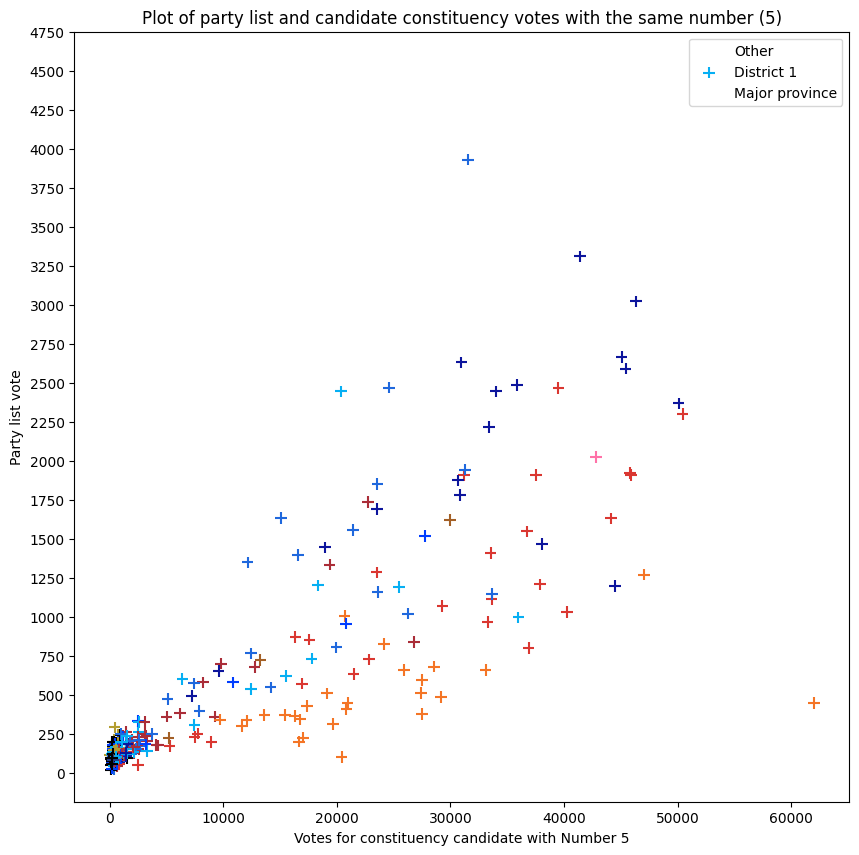

In [397]:
ax = plt.subplots(figsize = (10,10))
marker_lst = [".","+","*"]
alpha_lst = [0, 1,0]
type = ["Other", "District 1", "Major province"]
size_lst = [50, 70, 10]
for i, level in enumerate(party_result_id["status"].unique()):
    temp = party_result_id[party_result_id["status"] == level]
    plt.scatter(temp["CandidateConst_vote"], 
                temp["party_list_vote"], 
                c =temp["party_id_CandidateConst"].map(party_color_map),
                marker = marker_lst[i],
                label = type[i],
                s = size_lst[i],
                alpha = alpha_lst[i])
        
plt.xlabel("Votes for constituency candidate with Number %i" %(partylist_no))
plt.ylabel("Party list vote")
plt.title("Plot of party list and candidate constituency votes with the same number (%s)" %(int(partylist_no)))
plt.xticks(np.arange(0,70000,10000))
plt.yticks(np.arange(0,5000,250))
plt.legend()

In [366]:
party_result_id[party_result_id["status"]==2]

,party_id,party_list_vote,party_list_vote_percent,CandidateConst_vote,party_id_CandidateConst,status
cons_id,,,,,,
BKK_1,747,18,0.01907,133,721,2
BKK_10,747,30,0.02882,895,743,2
BKK_11,747,77,0.07504,36985,726,2
BKK_12,747,33,0.03101,1426,762,2
BKK_13,747,15,0.01494,1361,706,2
...,...,...,...,...,...,...
SPK_4,747,63,0.06188,822,719,2
SPK_5,747,102,0.08502,7555,763,2
SPK_6,747,59,0.05754,478,719,2


In [262]:
y, X = dmatrices("party_list_vote ~ candi_same_id_vote*isMajor", data = party_result_id, return_type='dataframe')

In [263]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:        party_list_vote   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     218.4
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           7.87e-80
Time:                        17:08:42   Log-Likelihood:                -2593.8
No. Observations:                 354   AIC:                             5196.
Df Residuals:                     350   BIC:                             5211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [187]:
party_result_id

,party_id,party_list_vote,party_list_vote_percent,candi_same_id_vote,isMajor
cons_id,,,,,
ACR_1,747,219,0.20744,2701,1
ACR_2,747,647,0.57864,17637,0
ATG_1,747,92,0.10250,1602,1
ATG_2,747,98,0.10714,194,0
AYA_1,747,83,0.07524,621,1
...,...,...,...,...,...
YLA_2,747,526,0.52433,453,0
YLA_3,747,480,0.49002,401,0
YST_1,747,112,0.10137,369,1
